In [4]:
# !wget https://nlp.cs.unc.edu/data/lxmert_data/vizwiz/vizwiz/valid.json
import json
def is_number(s):
  if s.isnumeric() or s.isdigit():
    return True
  try:
      float(s)
      return True
  except ValueError:
      return False

with open('pythia_result.json') as f:
  predict_result = json.load(f)

with open('valid.json') as f1:
  val_info = json.load(f1)

import collections

result = {}
for qa in val_info:
  result[qa["question_id"]] = qa
val_info = result




      # {
    #     "img_id":"VizWiz_val_000000028037",
    #     "label":{
    #         "72":1,
    #         "72 degrees":0.3
    #     },
    #     "question_id":"VizWiz_val_000000028037.jpg",
    #     "sent":"What temperature is the thermostat set to?",
    #     "answer":"unanswerable"
    # }

binary_qa = [] #3answers
nonanswerable_qa = [] #3answers
number_qa = []#3answers
all_qa = []

for qa in predict_result:
  info = val_info.get(qa["image"])
  info["answer"] = qa["answer"]
  all_qa.append(info)
  labels = info["label"].keys()
  if ("yes" in labels and info["label"]["yes"] >= 0.9) or ("no" in labels and info["label"]["no"] >= 0.9):
    binary_qa.append(info)
  if "unanswerable" in labels and info["label"]["unanswerable"] >= 0.9:
    nonanswerable_qa.append(info)
  for label in labels:
    if is_number(label) and info["label"][label] >= 0.9:
      number_qa.append(info)
      break



In [5]:
print(len(all_qa))
print(len(binary_qa))
print(len(nonanswerable_qa))
print(len(number_qa))
with open('all_qa_pred_result.json', 'w') as outfile:
    json.dump(all_qa, outfile)
with open('binary_qa_pred_result.json', 'w') as outfile:
    json.dump(binary_qa, outfile)
with open('nonanswerable_qa_pred_result.json', 'w') as outfile:
    json.dump(nonanswerable_qa, outfile)
with open('number_qa_pred_result.json', 'w') as outfile:
    json.dump(number_qa, outfile)

3173
154
749
61


In [6]:
binary_qa_pred_wrong = []
for qa in binary_qa:
  popular_labels = []
  max_score = 0
  for label,score in qa["label"].items():
    if score > max_score:
      popular_labels = [label]
      max_score = score
    elif score == max_score:
      popular_labels.append(label)

  if qa["answer"] not in popular_labels:
    binary_qa_pred_wrong.append(qa)
with open('binary_qa_pred_wrong.json', 'w') as outfile:
    json.dump(binary_qa_pred_wrong, outfile) 
print("binary wrong" + str(len(binary_qa_pred_wrong) / len(binary_qa)))


all_qa_pred_wrong = []
for qa in all_qa:
  popular_labels = []
  max_score = 0
  for label,score in qa["label"].items():
    if score > max_score:
      popular_labels = [label]
      max_score = score
    elif score == max_score:
      popular_labels.append(label)

  if qa["answer"] not in popular_labels:
    all_qa_pred_wrong.append(qa)
with open('all_qa_pred_wrong.json', 'w') as outfile:
    json.dump(all_qa_pred_wrong, outfile) 

print("all_qa_pred_wrong" + str(len(all_qa_pred_wrong) / len(all_qa)))

nonanswerable_qa_pred_wrong = []
for qa in nonanswerable_qa:
  popular_labels = []
  max_score = 0
  for label,score in qa["label"].items():
    if score > max_score:
      popular_labels = [label]
      max_score = score
    elif score == max_score:
      popular_labels.append(label)

  if qa["answer"] not in popular_labels:
    nonanswerable_qa_pred_wrong.append(qa)
with open('nonanswerable_qa_pred_wrong.json', 'w') as outfile:
    json.dump(nonanswerable_qa_pred_wrong, outfile) 

print("nonanswerable_qa_pred_wrong" + str(len(nonanswerable_qa_pred_wrong) / len(nonanswerable_qa)))


number_qa_pred_wrong = []
for qa in number_qa:
  popular_labels = []
  max_score = 0
  for label,score in qa["label"].items():
    if score > max_score:
      popular_labels = [label]
      max_score = score
    elif score == max_score:
      popular_labels.append(label)

  if qa["answer"] not in popular_labels:
    number_qa_pred_wrong.append(qa)
with open('number_qa_pred_wrong.json', 'w') as outfile:
    json.dump(number_qa_pred_wrong, outfile) 
print("number_qa_pred_wrong" + str(len(number_qa_pred_wrong) / len(number_qa)))


binary wrong0.37662337662337664
all_qa_pred_wrong0.5534194768358021
nonanswerable_qa_pred_wrong0.27102803738317754
number_qa_pred_wrong0.7868852459016393


In [7]:
#accuracy recalculate
all_qa_pred_result = all_qa

total_score = 0
for qa in all_qa_pred_result:
  if qa["answer"] in qa["label"].keys():
    score = qa["label"][qa["answer"]]
    if score == 0.3:
      total_score += 1.0/3
    elif score == 0.6:
      total_score += 2.0/3
    elif score >= 0.9:
      total_score += 1.0
print("acc for all is " + str(total_score/len(all_qa_pred_result)))

binary_qa_pred_result = binary_qa
total_score = 0
for qa in binary_qa_pred_result:
  if qa["answer"] in qa["label"].keys():
    score = qa["label"][qa["answer"]]
    if score == 0.3:
      total_score += 1.0/3
    elif score == 0.6:
      total_score += 2.0/3
    elif score >= 0.9:
      total_score += 1.0
print("acc for binary is " + str(total_score/len(binary_qa_pred_result)))

nonanswerable_qa_pred_result = nonanswerable_qa
total_score = 0
for qa in nonanswerable_qa_pred_result:
  if qa["answer"] in qa["label"].keys():
    score = qa["label"][qa["answer"]]
    if score == 0.3:
      total_score += 1.0/3
    elif score == 0.6:
      total_score += 2.0/3
    elif score >= 0.9:
      total_score += 1.0
print("acc for nonanswerable is " + str(total_score/len(nonanswerable_qa_pred_result)))

number_qa_pred_result = number_qa
total_score = 0
for qa in number_qa_pred_result:
  if qa["answer"] in qa["label"].keys():
    score = qa["label"][qa["answer"]]
    if score == 0.3:
      total_score += 1.0/3
    elif score == 0.6:
      total_score += 2.0/3
    elif score >= 0.9:
      total_score += 1.0
print("acc for number is " + str(total_score/len(number_qa_pred_result)))

acc for all is 0.5477466120390793
acc for binary is 0.7748917748917749
acc for nonanswerable is 0.8731642189586117
acc for number is 0.3224043715846994


In [8]:
print("all prediction cnt: " + str(len(all_qa_pred_result)))
print("all binary qa cnt: " + str(len(binary_qa_pred_result)))
print("all nonanswerable qa cnt: " + str(len(nonanswerable_qa_pred_result)))
print("all number qa cnt: " + str(len(number_qa_pred_result)))

all prediction cnt: 3173
all binary qa cnt: 154
all nonanswerable qa cnt: 749
all number qa cnt: 61


In [9]:
#edit distance
!pip install python-Levenshtein
from Levenshtein import distance

total_dist = 0
for qa in all_qa_pred_result:
  answer = qa["answer"]
  three = []
  six = []
  nine = []
  ones = []
  for label,score in qa["label"].items():
    dist = distance(answer,label)
    if score == 0.3:
      three.append(dist)
    elif score == 0.6:
      six.append(dist)
    elif score == 0.9:
      nine.append(dist)
    else:
      ones.append(dist)
  dist = sum(three) + sum(six)*2 + sum(nine)*3 +( (10-(len(three) + len(six) + len(nine)))/len(ones)*sum(ones) if len(ones) > 0 else 0)
  total_dist += (dist/10)
print("ave edit dist for all : " + str(total_dist/len(all_qa_pred_result)))

#binary
total_dist = 0
for qa in binary_qa_pred_result:
  answer = qa["answer"]
  three = []
  six = []
  nine = []
  ones = []
  for label,score in qa["label"].items():
    dist = distance(answer,label)
    if score == 0.3:
      three.append(dist)
    elif score == 0.6:
      six.append(dist)
    elif score == 0.9:
      nine.append(dist)
    else:
      ones.append(dist)
  dist = sum(three) + sum(six)*2 + sum(nine)*3 +( (10-(len(three) + len(six) + len(nine)))/len(ones)*sum(ones) if len(ones) > 0 else 0)
  total_dist += (dist/10)

print("ave edit dist for binary : " + str(total_dist/len(binary_qa_pred_result)))

#unanswerable
total_dist = 0
for qa in nonanswerable_qa_pred_result:
  answer = qa["answer"]
  three = []
  six = []
  nine = []
  ones = []
  for label,score in qa["label"].items():
    dist = distance(answer,label)
    if score == 0.3:
      three.append(dist)
    elif score == 0.6:
      six.append(dist)
    elif score == 0.9:
      nine.append(dist)
    else:
      ones.append(dist)
  dist = sum(three) + sum(six)*2 + sum(nine)*3 +( (10-(len(three) + len(six) + len(nine)))/len(ones)*sum(ones) if len(ones) > 0 else 0)
  total_dist += (dist/10)
print("ave edit dist for nonanswerable : " + str(total_dist/len(nonanswerable_qa_pred_result)))

#number
total_dist = 0
for qa in number_qa_pred_result:
  answer = qa["answer"]
  three = []
  six = []
  nine = []
  ones = []
  for label,score in qa["label"].items():
    dist = distance(answer,label)
    if score == 0.3:
      three.append(dist)
    elif score == 0.6:
      six.append(dist)
    elif score == 0.9:
      nine.append(dist)
    else:
      ones.append(dist)
  dist = sum(three) + sum(six)*2 + sum(nine)*3 +( (10-(len(three) + len(six) + len(nine)))/len(ones)*sum(ones) if len(ones) > 0 else 0)
  total_dist += (dist/10)

print("ave edit dist for number : " + str(total_dist/len(number_qa_pred_result)))

     |████████████████████████████████| 51kB 4.3MB/s 
  Created wheel for python-Levenshtein: filename=python_Levenshtein-0.12.2-cp37-cp37m-linux_x86_64.whl size=149816 sha256=f2bb0d76720899aa47e6fdb4dc28ae68d074ef00d898d0812decc5b68b75dc1c
  Stored in directory: /root/.cache/pip/wheels/b3/26/73/4b48503bac73f01cf18e52cd250947049a7f339e940c5df8fc
Successfully built python-Levenshtein
ave edit dist for all : 8.045792625275753
ave edit dist for binary : 5.270779220779224
ave edit dist for nonanswerable : 5.499465954606134
ave edit dist for number : 7.7672131147540995


total number of binary qa predicted wrong is : 58
number of workers vote for the wrong answer distribution: {2: 9, 0: 21, 1: 16, 3: 12}


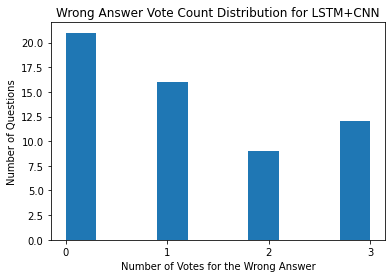

yes/no predicted opposite percentage: 0.5344827586206896
percentage of answer equals to unanswerable : 0.29310344827586204
percentage of questions starts with can you : 0.1724137931034483
percentage of questions contains but : 0.034482758620689655
question length distribution: {36: 2, 16: 2, 28: 2, 56: 1, 69: 1, 32: 2, 74: 2, 92: 1, 42: 2, 109: 1, 33: 2, 40: 1, 41: 2, 157: 1, 13: 3, 26: 2, 35: 1, 29: 1, 23: 4, 14: 1, 55: 2, 31: 1, 46: 2, 20: 1, 45: 1, 30: 1, 66: 1, 15: 1, 12: 1, 51: 1, 160: 1, 37: 1, 71: 1, 19: 1, 22: 1, 85: 1, 27: 1, 34: 1, 25: 1, 50: 1, 49: 1, 123: 1}
max len: 160, min len: 12, ave len: 44.172413793103445


In [10]:
#details for binary qa
binary_qa_wrong_cnt = len(binary_qa_pred_wrong)
print("total number of binary qa predicted wrong is : " + str(binary_qa_wrong_cnt))



#wrong answer vote distribution
d = {}
cnt = []
for qa in binary_qa_pred_wrong:
  if qa["answer"] in qa["label"].keys():
    score = qa["label"][qa["answer"]]
    num_votes = 1 if score == 0.3 else 2 if score == 0.6 else 3 if score == 0.9 else 4
    d[num_votes] = d.get(num_votes,0)+1
    cnt.append(num_votes)
  else:
    d[0] = d.get(0,0)+1
    cnt.append(0)
print("number of workers vote for the wrong answer distribution: " + str(d))

import matplotlib.pyplot as plt
import numpy as np
plt.hist(cnt)
bars = ('0','1','2','3')
x_pos = np.arange(len(bars))
plt.title('Wrong Answer Vote Count Distribution for LSTM+CNN')
plt.xlabel('Number of Votes for the Wrong Answer')
plt.ylabel('Number of Questions')
plt.xticks(x_pos, bars)
plt.show()


#yes no swap
yes_no_swap_cnt = 0
ave_score_for_wrong_ans = 0
for qa in binary_qa_pred_wrong:
  if qa["answer"] in ["yes","no"]:
    yes_no_swap_cnt += 1
    ave_score_for_wrong_ans += qa["label"][qa["answer"]] if qa["answer"] in qa["label"].keys() else 0
print("yes/no predicted opposite percentage: " + str(yes_no_swap_cnt/binary_qa_wrong_cnt))

#unanswerable_cnt
unanswerable_cnt = 0
for qa in binary_qa_pred_wrong:
  if qa["answer"] == "unanswerable":
    unanswerable_cnt += 1
print("percentage of answer equals to unanswerable : " + str(unanswerable_cnt/binary_qa_wrong_cnt))

#question starts with can you see / can you tell
can_you_see_cnt = 0
for qa in binary_qa_pred_wrong:
  if qa["sent"].lower().startswith("can you see"):
    can_you_see_cnt += 1
can_you_tell_cnt = 0
for qa in binary_qa_pred_wrong:
  if qa["sent"].lower().startswith("can you tell"):
    can_you_tell_cnt += 1
can_you_cnt = 0
for qa in binary_qa_pred_wrong:
  if qa["sent"].lower().startswith("can you"):
    can_you_cnt += 1
print("percentage of questions starts with can you : " + str(can_you_cnt/binary_qa_wrong_cnt))

#question contains but: "I know this is suntan lotion, but I was wondering which factor it is, if you can see, please."
but_cnt = 0
for qa in binary_qa_pred_wrong:
  if "but" in qa["sent"].lower():
    but_cnt += 1
print("percentage of questions contains but : " + str(but_cnt/binary_qa_wrong_cnt))

#question length analysis
question_length = {}
max_len = 0
ave_len = 0
min_len = 1000000
for qa in binary_qa_pred_wrong:
  q_len = len(qa["sent"])
  question_length[q_len] = question_length.get(q_len,0) + 1
  max_len = max(max_len,q_len)
  ave_len += q_len
  min_len = min(min_len,q_len)
print("question length distribution: " + str(question_length))
ave_len /=len(binary_qa_pred_wrong)
print("max len: {}, min len: {}, ave len: {}".format(max_len,min_len,ave_len))


total number of number qa predicted wrong is : 48
number of workers vote for the wrong answer distribution: {0: 36, 1: 6, 3: 2, 2: 4}


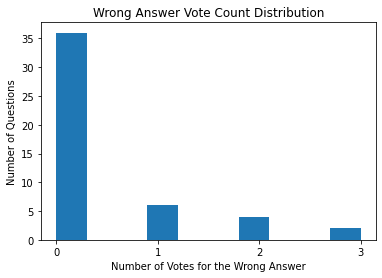

percentage of answers not number: 0.6875
percentage of answer equals to unanswerable : 0.4166666666666667
question length distribution: {25: 2, 19: 1, 31: 3, 9: 1, 41: 2, 47: 1, 42: 2, 29: 1, 17: 2, 45: 1, 52: 1, 46: 2, 26: 2, 40: 3, 28: 1, 37: 3, 20: 1, 93: 1, 34: 1, 27: 2, 53: 1, 38: 1, 89: 1, 23: 1, 43: 1, 36: 1, 39: 1, 129: 1, 59: 1, 69: 1, 62: 1, 44: 2, 21: 1, 18: 1}
max len: 129, min len: 9, ave len: 39.895833333333336
percentage of questions contains but : 0.0625
percentage of questions starts with can you : 0.10416666666666667


In [11]:
def is_number(s):
  if s.isnumeric() or s.isdigit():
    return True
  try:
      float(s)
      return True
  except ValueError:
      return False

#details for number_qa
number_qa_wrong_cnt = len(number_qa_pred_wrong)
print("total number of number qa predicted wrong is : " + str(number_qa_wrong_cnt))


d = {}
cnt = []
for qa in number_qa_pred_wrong:
  if qa["answer"] in qa["label"].keys():
    score = qa["label"][qa["answer"]]
    num_votes = 1 if score == 0.3 else 2 if score == 0.6 else 3 if score == 0.9 else 4
    d[num_votes] = d.get(num_votes,0)+1
    cnt.append(num_votes)
  else:
    d[0] = d.get(0,0)+1
    cnt.append(0)
print("number of workers vote for the wrong answer distribution: " + str(d))

plt.hist(cnt)
bars = ('0','1','2','3')
x_pos = np.arange(len(bars))
plt.title('Wrong Answer Vote Count Distribution')
plt.xlabel('Number of Votes for the Wrong Answer')
plt.ylabel('Number of Questions')
plt.xticks(x_pos, bars)
plt.show()

#answer not number cnt
ans_not_num_cnt = 0
for qa in number_qa_pred_wrong:
  if not is_number(qa["answer"]):
    ans_not_num_cnt += 1
print("percentage of answers not number: " + str(ans_not_num_cnt/number_qa_wrong_cnt))

#unanswerable_cnt
unanswerable_cnt = 0
for qa in number_qa_pred_wrong:
  if qa["answer"] == "unanswerable":
    unanswerable_cnt += 1
print("percentage of answer equals to unanswerable : " + str(unanswerable_cnt/number_qa_wrong_cnt))

max_len = 0
ave_len = 0
min_len = 1000000
#question length analysis
question_length = {}
for qa in number_qa_pred_wrong:
  q_len = len(qa["sent"])
  max_len = max(max_len,q_len)
  ave_len += q_len
  min_len = min(min_len,q_len)
  question_length[q_len] = question_length.get(q_len,0) + 1
print("question length distribution: " + str(question_length))
ave_len /=len(number_qa_pred_wrong)
print("max len: {}, min len: {}, ave len: {}".format(max_len,min_len,ave_len))

#question contains but: "I know this is suntan lotion, but I was wondering which factor it is, if you can see, please."
but_cnt = 0
for qa in number_qa_pred_wrong:
  if "but" in qa["sent"].lower():
    but_cnt += 1
print("percentage of questions contains but : " + str(but_cnt/number_qa_wrong_cnt))

can_you_cnt = 0
for qa in number_qa_pred_wrong:
  if qa["sent"].lower().startswith("can you"):
    can_you_cnt += 1
print("percentage of questions starts with can you : " + str(can_you_cnt/number_qa_wrong_cnt))


total number of unanswerable qa predicted wrong is : 203
number of workers vote for the wrong answer distribution: {1: 45, 3: 63, 2: 45, 0: 50}


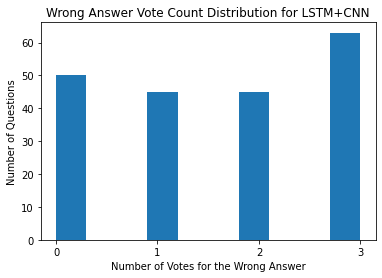

output answer is binary percentage: 0.11822660098522167
output answer is number percentage: 0.009852216748768473
question length distribution: {32: 8, 26: 5, 24: 7, 29: 5, 25: 7, 36: 8, 15: 3, 23: 4, 48: 1, 16: 4, 34: 4, 13: 25, 56: 3, 11: 4, 28: 7, 37: 2, 94: 1, 187: 1, 12: 1, 30: 3, 51: 2, 92: 1, 21: 9, 31: 6, 27: 5, 17: 4, 19: 8, 41: 2, 67: 4, 114: 1, 38: 1, 20: 10, 33: 1, 42: 3, 43: 2, 168: 1, 35: 1, 46: 3, 45: 2, 39: 3, 66: 1, 40: 3, 206: 1, 61: 2, 18: 5, 59: 1, 62: 1, 50: 3, 129: 1, 85: 2, 93: 1, 106: 1, 72: 1, 97: 1, 22: 1, 49: 1, 58: 1, 44: 1, 104: 1, 87: 1, 9: 1}
max len: 206, min len: 9, ave len: 147.3125
percentage of questions contains but : 0.009852216748768473
percentage of questions starts with can you : 0.059113300492610835


In [12]:
#details for unanswerable
nonanswerable_qa_wrong_cnt = len(nonanswerable_qa_pred_wrong)
print("total number of unanswerable qa predicted wrong is : " + str(nonanswerable_qa_wrong_cnt))

#wrong answer vote distribution
d = {}
cnt = []
for qa in nonanswerable_qa_pred_wrong:
  if qa["answer"] in qa["label"].keys():
    score = qa["label"][qa["answer"]]
    num_votes = 1 if score == 0.3 else 2 if score == 0.6 else 3 if score == 0.9 else 4
    d[num_votes] = d.get(num_votes,0)+1
    cnt.append(num_votes)
  else:
    d[0] = d.get(0,0)+1
    cnt.append(0)
print("number of workers vote for the wrong answer distribution: " + str(d))

plt.hist(cnt)
bars = ('0','1','2','3')
x_pos = np.arange(len(bars))
plt.title('Wrong Answer Vote Count Distribution for LSTM+CNN')
plt.xlabel('Number of Votes for the Wrong Answer')
plt.ylabel('Number of Questions')
plt.xticks(x_pos, bars)
plt.show()

#binary
binary_answer_cnt = 0
for qa in nonanswerable_qa_pred_wrong:
  if qa["answer"] in ["yes","no"]:
    binary_answer_cnt += 1
print("output answer is binary percentage: " + str(binary_answer_cnt/nonanswerable_qa_wrong_cnt))

#number
number_answer_cnt = 0
for qa in nonanswerable_qa_pred_wrong:
  if is_number(qa["answer"]):
    number_answer_cnt += 1
print("output answer is number percentage: " + str(number_answer_cnt/nonanswerable_qa_wrong_cnt))


#question length analysis
max_len = 0
ave_len = 0
min_len = 1000000
question_length = {}
for qa in nonanswerable_qa_pred_wrong:
  q_len = len(qa["sent"])
  max_len = max(max_len,q_len)
  ave_len += q_len
  min_len = min(min_len,q_len)
  question_length[q_len] = question_length.get(q_len,0) + 1
print("question length distribution: " + str(question_length))
ave_len /=len(number_qa_pred_wrong)
print("max len: {}, min len: {}, ave len: {}".format(max_len,min_len,ave_len))

#question contains but: "I know this is suntan lotion, but I was wondering which factor it is, if you can see, please."
but_cnt = 0
for qa in nonanswerable_qa_pred_wrong:
  if "but" in qa["sent"].lower():
    but_cnt += 1
print("percentage of questions contains but : " + str(but_cnt/nonanswerable_qa_wrong_cnt))


can_you_cnt = 0
for qa in nonanswerable_qa_pred_wrong:
  if qa["sent"].lower().startswith("can you"):
    can_you_cnt += 1
print("percentage of questions starts with can you : " + str(can_you_cnt/nonanswerable_qa_wrong_cnt))

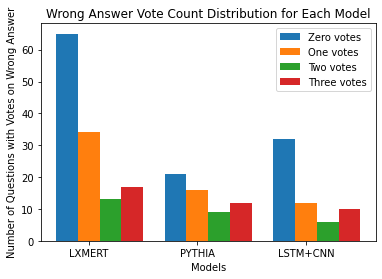

In [17]:
import matplotlib.pyplot as plt
import numpy as np
# lstm binary
# {1: 34, 0: 65, 3: 17, 2: 13}
# pythia binary
# {2: 9, 0: 21, 1: 16, 3: 12}
# lxmert binary
# {1: 12, 0: 32, 3: 10, 2: 6}

x=np.arange(3)
zero = [65,21,32]
one = [34,16,12]
two = [13,9,6]
three = [17,12,10]
width = 0.2

plt.bar(x-0.2, zero, width)
plt.bar(x,one, width)
plt.bar(x+0.2, two, width)
plt.bar(x+0.4, three, width)

plt.xticks(x, ['LXMERT', 'PYTHIA', 'LSTM+CNN'])
plt.xlabel("Models")
plt.ylabel("Number of Questions with Votes on Wrong Answer")
plt.legend(["Zero votes", "One votes", "Two votes","Three votes"])
plt.title('Wrong Answer Vote Count Distribution for Each Model')
plt.show()


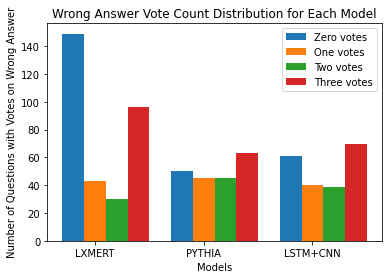

In [18]:
import matplotlib.pyplot as plt
import numpy as np
# lstm binary
# {0: 149, 3: 96, 2: 30, 1: 43}
# pythia binary
# {1: 45, 3: 63, 2: 45, 0: 50}
# lxmert binary
#  {0: 61, 3: 70, 1: 40, 2: 39}

x=np.arange(3)
zero = [149,50,61]
one = [43,45,40]
two = [30,45,39]
three = [96,63,70]
width = 0.2

plt.bar(x-0.2, zero, width)
plt.bar(x,one, width)
plt.bar(x+0.2, two, width)
plt.bar(x+0.4, three, width)

plt.xticks(x, ['LXMERT', 'PYTHIA', 'LSTM+CNN'])
plt.xlabel("Models")
plt.ylabel("Number of Questions with Votes on Wrong Answer")
plt.legend(["Zero votes", "One votes", "Two votes","Three votes"])
plt.title('Wrong Answer Vote Count Distribution for Each Model')
plt.show()
